In [20]:
import pandas as pd

# Load the dataset
df = pd.read_csv('messenger_reviews.csv')

# Convert the 'at' column to datetime for proper filtering
df['at'] = pd.to_datetime(df['at'], errors='coerce')

# Filter out rows with empty 'reviewCreatedVersion'
df_filtered = df[df['reviewCreatedVersion'].notna()]

# Filter the dataset for reviews between 1/1/2020 and 10/31/2024
start_date = '2020-01-01'
end_date = '2024-10-31'
df_filtered = df_filtered[(df_filtered['at'] >= start_date) & (df_filtered['at'] <= end_date)]

# Save the filtered dataset to a new CSV file
df_filtered.to_csv('filtered_messenger_reviews.csv', index=False)

print("Filtered dataset saved as 'filtered_messenger_reviews.csv'")


Filtered dataset saved as 'filtered_messenger_reviews.csv'


Mean Score: 2.774232071632285
Median Score: 2.0
Mode Score: 1
Range of Scores: 4
Variance of Scores: 3.3591476599909016
Standard Deviation of Scores: 1.8327977684378878


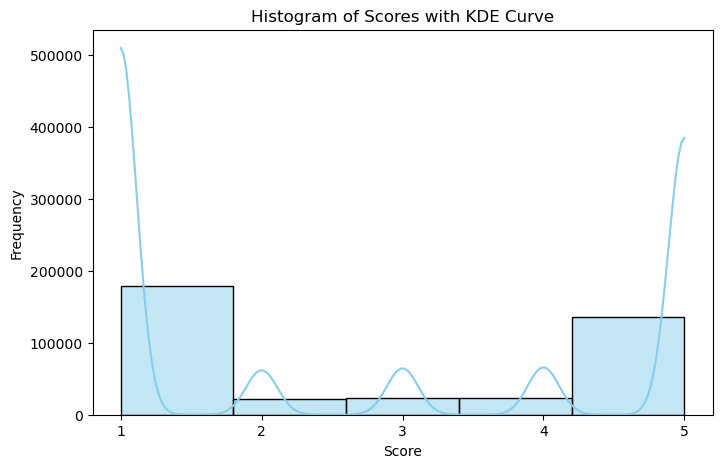

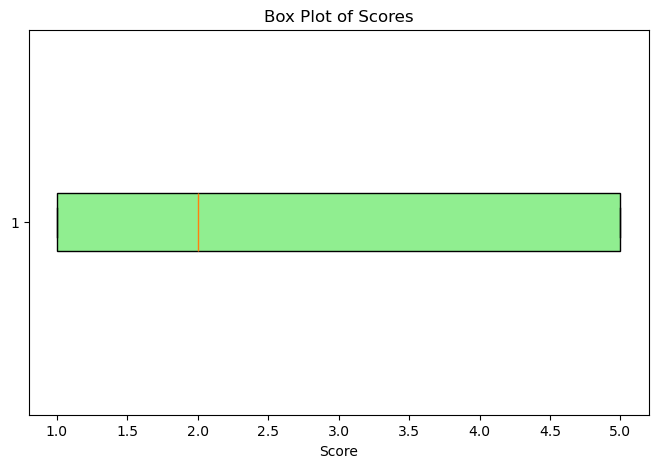

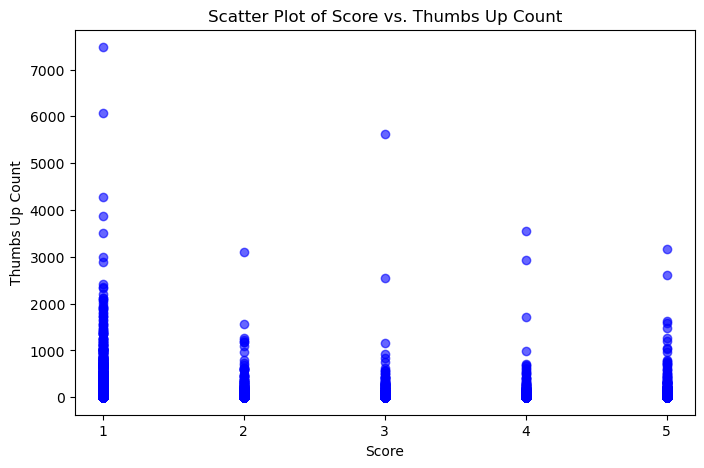

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("messenger_reviews.csv")

# Central Trend Measures
mean_score = data['score'].mean()
median_score = data['score'].median()
mode_score = data['score'].mode()[0]

print("Mean Score:", mean_score)
print("Median Score:", median_score)
print("Mode Score:", mode_score)

# Dispersion Measures
score_range = data['score'].max() - data['score'].min()
score_variance = data['score'].var()
score_std_dev = data['score'].std()

print("Range of Scores:", score_range)
print("Variance of Scores:", score_variance)
print("Standard Deviation of Scores:", score_std_dev)

# Histogram with KDE
plt.figure(figsize=(8, 5))
sns.histplot(data['score'], kde=True, bins=5, color='skyblue', edgecolor='black', kde_kws={'bw_adjust': 0.8})
plt.title("Histogram of Scores with KDE Curve")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.xticks([1, 2, 3, 4, 5])  # Discrete x-axis values
plt.show()

# Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(data['score'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title("Box Plot of Scores")
plt.xlabel("Score")
plt.show()

# Scatter Plot with Discrete Axes
plt.figure(figsize=(8, 5))
plt.scatter(data['score'], data['thumbsUpCount'], alpha=0.6, c='blue')
plt.title("Scatter Plot of Score vs. Thumbs Up Count")
plt.xlabel("Score")
plt.ylabel("Thumbs Up Count")
plt.xticks([1, 2, 3, 4, 5])  # Ensure x-axis ticks are discrete
plt.show()


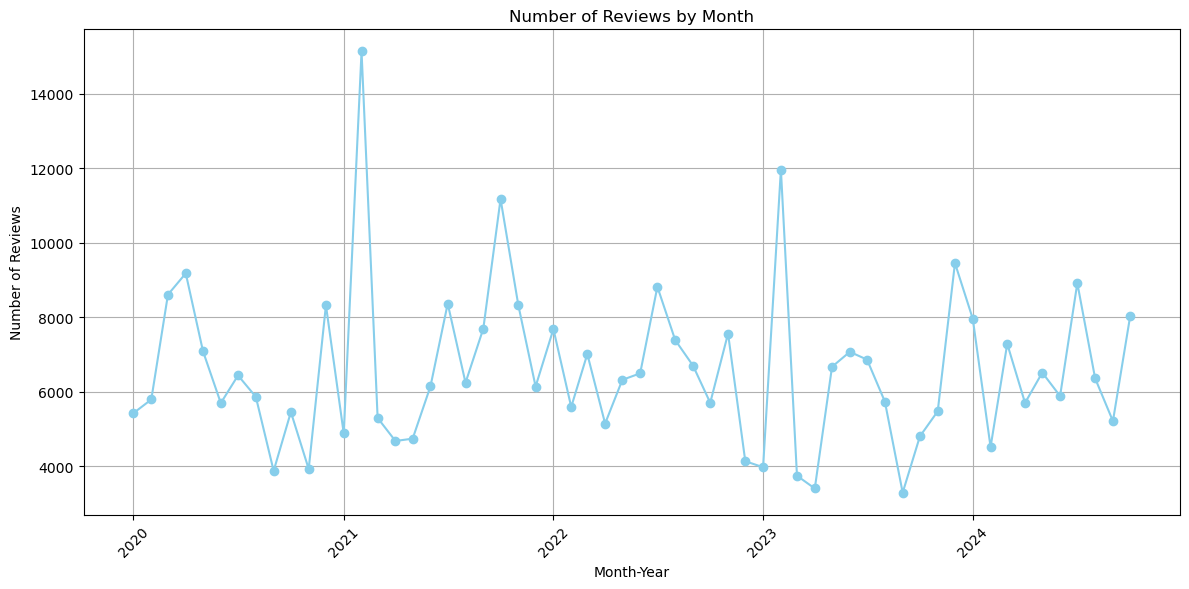

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('messenger_reviews.csv')

# Convert 'at' column to datetime
df['at'] = pd.to_datetime(df['at'])

# Create a new column for month-year
df['month_year'] = df['at'].dt.to_period('M').astype(str)

# Aggregate number of reviews by month-year
monthly_reviews = df.groupby('month_year').size().reset_index(name='review_count')

# Sort by month-year
monthly_reviews['month_year'] = pd.to_datetime(monthly_reviews['month_year'])
monthly_reviews = monthly_reviews.sort_values('month_year')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_reviews['month_year'], monthly_reviews['review_count'], marker='o', color='skyblue')
plt.title('Number of Reviews by Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Reviews')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


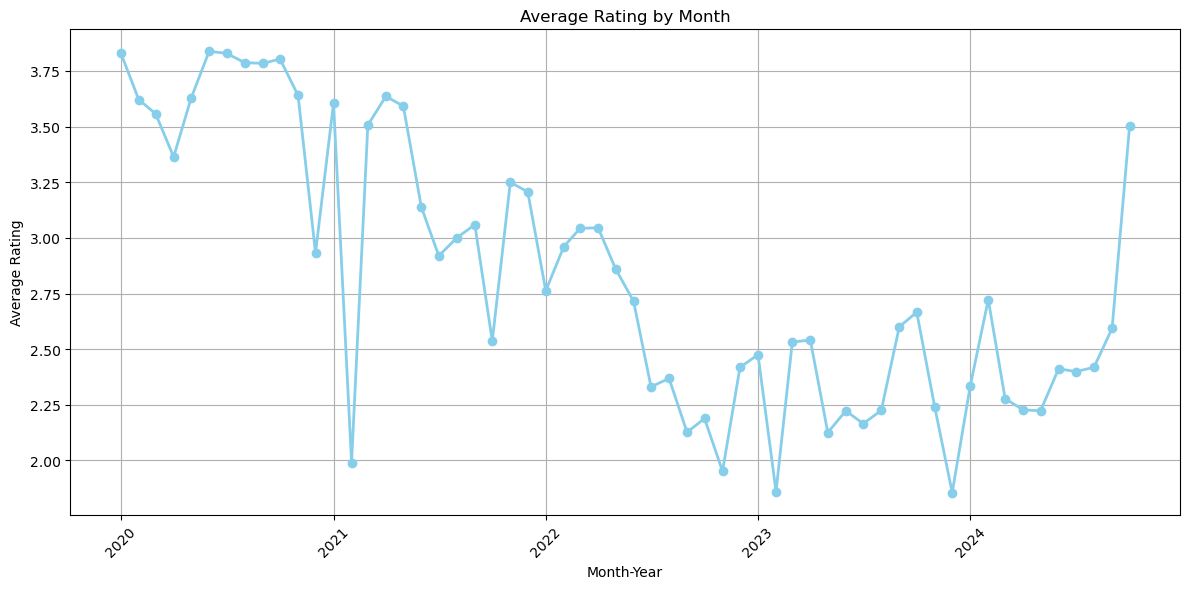

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('messenger_reviews.csv')

# Convert 'at' column to datetime format
df['at'] = pd.to_datetime(df['at'])

# Extract the month and year
df['month_year'] = df['at'].dt.to_period('M').astype(str)

# Group by month_year and calculate the average score
monthly_avg_rating = df.groupby('month_year').agg(
    avg_rating=('score', 'mean')
).reset_index()

# Convert 'month_year' back to datetime for proper plotting
monthly_avg_rating['month_year'] = pd.to_datetime(monthly_avg_rating['month_year'])
monthly_avg_rating = monthly_avg_rating.sort_values('month_year')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_rating['month_year'], monthly_avg_rating['avg_rating'], marker='o', color='skyblue', linestyle='-', linewidth=2)

plt.title('Average Rating by Month')
plt.xlabel('Month-Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_19060\1834539014.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='reviewCreatedVersion', y='rating_count', data=top_10_most_rated_versions, palette='viridis')


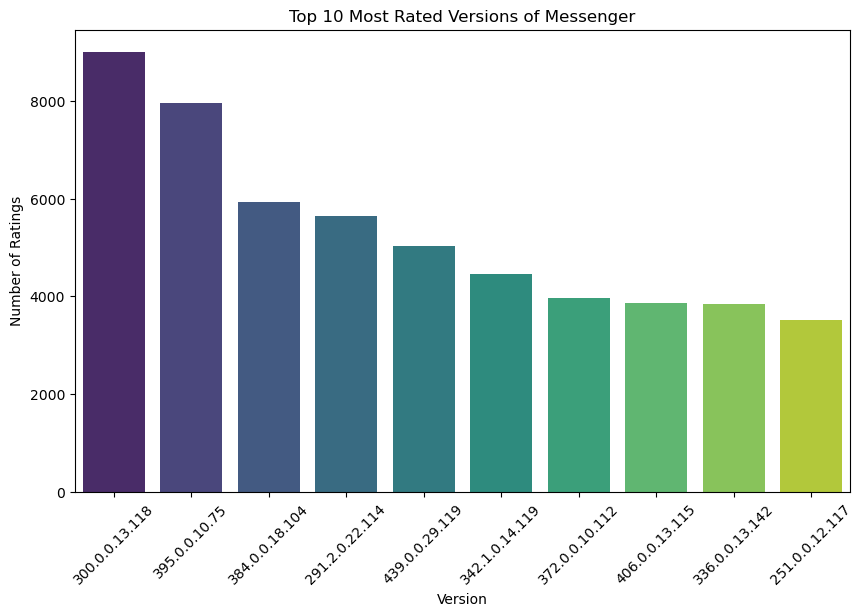

    reviewCreatedVersion  rating_count
300       300.0.0.13.118          9005
486        395.0.0.10.75          7945
462       384.0.0.18.104          5934
275       291.2.0.22.114          5651
572       439.0.0.29.119          5036
386       342.1.0.14.119          4450
437       372.0.0.10.112          3956
509       406.0.0.13.115          3853
373       336.0.0.13.142          3834
205       251.0.0.12.117          3511


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("messenger_reviews.csv")

# Group by reviewCreatedVersion and count the number of ratings for each version
most_rated_versions = data.groupby('reviewCreatedVersion')['score'].count().reset_index()

# Rename the column to 'rating_count' for clarity
most_rated_versions = most_rated_versions.rename(columns={'score': 'rating_count'})

# Sort by rating_count in descending order and select the top 10
top_10_most_rated_versions = most_rated_versions.sort_values(by='rating_count', ascending=False).head(10)

# Plotting the chart
plt.figure(figsize=(10, 6))
sns.barplot(x='reviewCreatedVersion', y='rating_count', data=top_10_most_rated_versions, palette='viridis')

# Chart labels and title
plt.title("Top 10 Most Rated Versions of Messenger")
plt.xlabel("Version")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

# Export the result to CSV
top_10_most_rated_versions.to_csv("top_10_most_rated_versions.csv", index=False)

# Print the top 10 most rated versions
print(top_10_most_rated_versions)
